# Scrapeando Chocolate!

Después de comer barras de chocolate toda tu vida, has decidido ir en busca de la mejor barra de chocolate del mundo.

Usted ha encontrado un sitio web que tiene más de 1700 comentarios de barras de chocolate de todo el mundo. Los datos se muestran en esta web: https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html

Los datos se muestran en una tabla, en lugar de un csv. Afortunadamente, tenemos el poder de BeautifulSoup que nos ayudará a transformar esta página web en un DataFrame que podemos manipular y analizar.

La escala de calificación es del 1 al 5, como se describe en esta guía de reviews (http://flavorsofcacao.com/review_guide.html). A1 es "desagradable" el chocolate, mientras que 5 es una barra que trasciende "más allá de los límites ordinarios".

Algunas de las preguntas en las que pensamos cuando encontramos este conjunto de datos fueron: ¿Dónde se cultivan los mejores granos de cacao? ¿Qué países producen las barras de mayor calificación? ¿Cuál es la relación entre el porcentaje de sólidos de cacao y la clasificación?

¿Podemos encontrar una manera de responder a estas preguntas, o descubrir más preguntas, usando BeautifulSoup y Pandas?

### Haga sopa de chocolate!

1. Explore la página web que aparece aqui: https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html . ¿Qué elementos podrían ser útiles para escrapear aquí? ¿Qué elementos no queremos escrapear?

Si desea utilizar su navegador para inspeccionar el sitio web, es posible que necesite refrescar el concepto en devTools: https://developers.google.com/web/tools/chrome-devtools

2. Hagamos una petición a este sitio para obtener el HTML en bruto, que luego podemos convertir en un objeto BeautifulSoup.

La URL es: https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html

Puede pasar esto al método `.get()` del modulo `requests` para obtener el HTML.

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [2]:
webpage = requests.get(' https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html')

In [3]:
webpage.text

'<!DOCTYPE html>\n<html lang="en">\n   <head>\n      <meta charset="utf-8">\n      <style>\n         #cacaoTable {\n         border-collapse: collapse;\n         border: 2px black solid;\n         font: 12px sans-serif;\n         }\n         #cacaoTable td {\n         border: 1px black solid;\n         padding: 5px;\n         }\n         #infoContainer {\n         margin-bottom: 10px;\n         display: inline-block;\n         margin-right: 10px;\n         }\n         #chocolate {\n         width: 300px;\n         }\n         #picContainer {\n         display: inline;\n         }\n      </style>\n   </head>\n   <body>\n      <!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->\n      <div id="banner">\n         <h1>Cacao Ratings</h1>\n      </div>\n      <div id="infoContainer">\n         <table class="infoTable">\n            <tr>\n               <td>Compiled ratings of over 1700 Chocolate bars</td>\n            </tr>\n            <tr>\n               <td>Ratings are from 1-5

3. Cree un objeto BeautifulSoup llamado `soup` a través de este HTML.
Utilice `"html.parser"` como el analizador, y el contenido de la respuesta que obtuvo de su solicitud como el documento.

In [5]:
soup = BeautifulSoup(webpage.text, 'html.parser')

4. Si lo desea, imprima el objeto `soup` para explorar el HTML.
¡Cuánta cantidad de filas! Probablemente esté muy aliviado de que no tengamos que scrapear esta información a mano.

In [6]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

In [7]:
len(soup.find_all('td'))

16166

In [8]:
len(soup.find_all('tr'))

1798

### ¿Cómo se distribuyen las calificaciones?

5. ¿Cuántas barras de chocolate terribles hay ahí fuera? ¿Y cuántos se ganaron un 5 perfecto? Hagamos un histograma de estos datos.

Lo primero que hay que hacer es poner todas las clasificaciones en una lista.
Utilice un comando en el objeto `soup` para obtener todas las etiquetas que contienen las clasificaciones.

In [9]:
rating_elements = soup.find_all(attrs={ 'class': 'Rating'})
rating_elements

[<td class="Rating">Rating</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">4</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3</td>,
 <td class="Rating">3.25</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3</td>,
 <td class="Rating">3.25</td>,
 <td class="Rating">4</td>,
 <td class="Rating">3.25</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">4</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">3.75</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3.25</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">3.5</td>,
 <td class="Rating">2.75</td>,
 <td class="Rating">3</td>,
 <td class="Rating">3</td>,
 <td cl

6. Cree una lista vacía llamada `ratings` para guardar todos los rating alli.

In [10]:
ratings = []
for rating_elem in rating_elements:
    ratings.append(rating_elem.get_text())
ratings.pop(0)
ratings

['3.75',
 '2.75',
 '3',
 '3.5',
 '3.5',
 '2.75',
 '3.5',
 '3.5',
 '3.75',
 '4',
 '2.75',
 '3',
 '3.25',
 '3.75',
 '2.75',
 '3',
 '3.25',
 '4',
 '3.25',
 '3.5',
 '4',
 '3.5',
 '3.75',
 '3.75',
 '3.75',
 '2.75',
 '3.25',
 '3.5',
 '3.5',
 '2.75',
 '3',
 '3',
 '3.75',
 '2.75',
 '2.75',
 '2.75',
 '2.75',
 '3',
 '2.5',
 '2.5',
 '3.5',
 '3.5',
 '3.5',
 '3.5',
 '2.75',
 '3',
 '2.5',
 '2.5',
 '2.75',
 '2.5',
 '3',
 '3.25',
 '3',
 '3.25',
 '4',
 '3.75',
 '4',
 '3',
 '3',
 '2.75',
 '3.5',
 '3',
 '3.75',
 '3',
 '2.75',
 '2.75',
 '3',
 '3.25',
 '3.5',
 '3',
 '3.25',
 '3.25',
 '3.25',
 '3.25',
 '3.5',
 '3.75',
 '4',
 '4',
 '5',
 '3',
 '3',
 '3.5',
 '3.75',
 '4',
 '3.5',
 '3.5',
 '5',
 '4',
 '3.25',
 '2.75',
 '3.75',
 '3.75',
 '4',
 '3',
 '3.5',
 '3',
 '2.5',
 '2.75',
 '3',
 '3.5',
 '3.75',
 '3.5',
 '3.25',
 '3.25',
 '3.5',
 '3.75',
 '3.5',
 '4',
 '4',
 '3.75',
 '3.25',
 '3.25',
 '3.5',
 '3.5',
 '3.75',
 '3.5',
 '3.75',
 '4',
 '2.75',
 '3.25',
 '3.5',
 '3.25',
 '3.75',
 '4',
 '2.75',
 '1.75',
 '3.75'

7. Recorra las etiquetas de clasificación y obtenga el texto contenido en cada una de ellas. Añádelo a la lista de `ratings`.

Al hacer esto, convierta la clasificación en un `float`, de modo que la lista de clasificaciones sea numérica. Esto debería ayudar con los cálculos más adelante.

In [13]:
ratings = [float(rating) for rating in ratings]
ratings

[3.75,
 2.75,
 3.0,
 3.5,
 3.5,
 2.75,
 3.5,
 3.5,
 3.75,
 4.0,
 2.75,
 3.0,
 3.25,
 3.75,
 2.75,
 3.0,
 3.25,
 4.0,
 3.25,
 3.5,
 4.0,
 3.5,
 3.75,
 3.75,
 3.75,
 2.75,
 3.25,
 3.5,
 3.5,
 2.75,
 3.0,
 3.0,
 3.75,
 2.75,
 2.75,
 2.75,
 2.75,
 3.0,
 2.5,
 2.5,
 3.5,
 3.5,
 3.5,
 3.5,
 2.75,
 3.0,
 2.5,
 2.5,
 2.75,
 2.5,
 3.0,
 3.25,
 3.0,
 3.25,
 4.0,
 3.75,
 4.0,
 3.0,
 3.0,
 2.75,
 3.5,
 3.0,
 3.75,
 3.0,
 2.75,
 2.75,
 3.0,
 3.25,
 3.5,
 3.0,
 3.25,
 3.25,
 3.25,
 3.25,
 3.5,
 3.75,
 4.0,
 4.0,
 5.0,
 3.0,
 3.0,
 3.5,
 3.75,
 4.0,
 3.5,
 3.5,
 5.0,
 4.0,
 3.25,
 2.75,
 3.75,
 3.75,
 4.0,
 3.0,
 3.5,
 3.0,
 2.5,
 2.75,
 3.0,
 3.5,
 3.75,
 3.5,
 3.25,
 3.25,
 3.5,
 3.75,
 3.5,
 4.0,
 4.0,
 3.75,
 3.25,
 3.25,
 3.5,
 3.5,
 3.75,
 3.5,
 3.75,
 4.0,
 2.75,
 3.25,
 3.5,
 3.25,
 3.75,
 4.0,
 2.75,
 1.75,
 3.75,
 3.25,
 3.25,
 3.5,
 2.5,
 2.75,
 1.75,
 3.0,
 3.0,
 3.25,
 3.75,
 2.75,
 3.75,
 3.75,
 3.75,
 3.75,
 2.5,
 3.0,
 3.25,
 3.5,
 3.0,
 2.5,
 2.5,
 2.75,
 3.5,
 3.5,
 4.0,
 3.25,
 3.5

8. Utilizando Matplotlib, cree un histograma de los valores de los ratings:

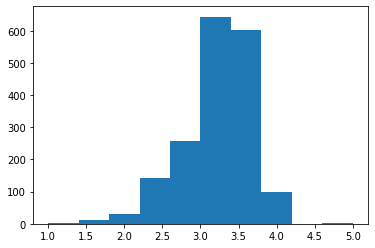

In [15]:
plt.hist(ratings)
plt.show()

### ¿Qué chocolatero hace el mejor chocolate?

9. Ahora queremos encontrar a los 10 chocolateros más valorados. Una forma de hacerlo es hacer un DataFrame que tenga las empresas chocolateras en una columna y los ratings en otra. Entonces, podemos hacer un grupo para encontrar a los que tengan la puntuación media más alta.

Primero, busquemos todas las etiquetas en la página web que contienen los nombres de las empresas.

In [16]:
company_elements = soup.find_all(attrs={ 'class': 'Company'})
company_elements

[<td class="Company">Company 
                (Maker-if known)
             </td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">A. Morin</td>,
 <td class="Company">Acalli</td>,
 <td class="Company">Acalli</td>,
 <td class="Company">

10. Al igual que hicimos con los ratings, ahora queremos hacer una lista vacía para guardar los nombres de las empresas. Llamela `company`

In [18]:
company = []
for company_elem in company_elements:
    company.append(company_elem.get_text())
company.pop(0)
company

['A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'Acalli',
 'Acalli',
 'Adi',
 'Adi',
 'Adi',
 'Adi',
 'Aequare (Gianduja)',
 'Aequare (Gianduja)',
 'Ah Cacao',
 "Akesson's (Pralus)",
 "Akesson's (Pralus)",
 "Akesson's (Pralus)",
 'Alain Ducasse',
 'Alain Ducasse',
 'Alain Ducasse',
 'Alain Ducasse',
 'Alain Ducasse',
 'Alexandre',
 'Alexandre',
 'Alexandre',
 'Alexandre',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Altus aka Cao Artisan',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amano',
 'Amatller (Simon Coll)

In [28]:
def get_values(column_name):
    elements = soup.find_all(attrs={ 'class': column_name})
    column = []
    for element in elements:
        column.append(element.get_text())
    column.pop(0)
    return column

origin = get_values('Origin')
review_date = get_values('ReviewDate')
cocoa_percent = get_values('CocoaPercent')
company_location = get_values('CompanyLocation')
bean_type = get_values('BeanType')
broad_bean_origin = get_values('BroadBeanOrigin')

11. Recorra las etiquetas que contienen nombres de empresas y añada el texto de cada etiqueta a la lista que acaba de crear.

In [31]:
choco_df = pd.DataFrame({
    'Company': company,
    'Origin': origin,
    'Review Date': review_date,
    'Cocoa Percent': cocoa_percent,
    'Company Location': company_location,
    'Bean Type': bean_type,
    'Broad Bean Origin': 'broad_bean_origin',
    'Rating': ratings
})
choco_df

,Company,Origin,Review Date,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin,Rating
0,A. Morin,Agua Grande,2016,63%,France,,broad_bean_origin,3.75
1,A. Morin,Kpime,2015,70%,France,,broad_bean_origin,2.75
2,A. Morin,Atsane,2015,70%,France,,broad_bean_origin,3.00
3,A. Morin,Akata,2015,70%,France,,broad_bean_origin,3.50
4,A. Morin,Quilla,2015,70%,France,,broad_bean_origin,3.50
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,2011,70%,Austria,,broad_bean_origin,3.75
1791,Zotter,Congo,2011,65%,Austria,Forastero,broad_bean_origin,3.00
1792,Zotter,Kerala State,2011,65%,Austria,Forastero,broad_bean_origin,3.50
1793,Zotter,Kerala State,2011,62%,Austria,,broad_bean_origin,3.25


In [34]:
choco_df.sort_values(by=['Rating'], ascending=False).head(10).reset_index()

,index,Company,Origin,Review Date,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin,Rating
0,78,Amedei,Chuao,2007,70%,Italy,Trinitario,broad_bean_origin,5.0
1,86,Amedei,Toscano Black,2006,70%,Italy,Blend,broad_bean_origin,5.0
2,222,Bonnat,Kaori,2014,75%,France,,broad_bean_origin,4.0
3,76,Amedei,Porcelana,2007,70%,Italy,Criollo (Porcelana),broad_bean_origin,4.0
4,1663,Tobago Estate (Pralus),"Roxborough, Tobago",2012,70%,France,Trinitario,broad_bean_origin,4.0
5,179,Benoit Nihant,Rio Peripa H.,2013,73%,Belgium,Trinitario,broad_bean_origin,4.0
6,180,Benoit Nihant,"Bali, Sukrama Bros. Farm, Melaya, 62hr C",2011,72%,Belgium,Trinitario,broad_bean_origin,4.0
7,1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",2011,70%,Canada,,broad_bean_origin,4.0
8,1543,Soma,Peruvian,2011,64%,Canada,,broad_bean_origin,4.0
9,1393,Rogue,"Silvestre, Batch 7, 2013",2013,75%,U.S.A.,,broad_bean_origin,4.0


In [35]:
report = choco_df.profile_report(sort='None', html={ 'style': {'full_width': True}})
report
report.to_file(output_file='reporte-chocolate.html')